# JavaScript对象：你知道全部的对象分类吗？

### JavaScript 中的对象分类
我们可以把对象分成几类。
1. 宿主对象（host Objects）：由 JavaScript 宿主环境提供的对象，它们的行为完全由宿主环境决定。
2. 内置对象（Built-in Objects）：由 JavaScript 语言提供的对象。
3. 固有对象（Intrinsic Objects ）：由标准规定，随着 JavaScript 运行时创建而自动创建的对象实例。
4. 原生对象（Native Objects）：可以由用户通过 Array、RegExp 等内置构造器或者特殊语法创建的对象。
5. 普通对象（Ordinary Objects）：由{}语法、Object 构造器或者 class 关键字定义类创建的对象，它能够被原型继承。

#### 内置对象·原生对象
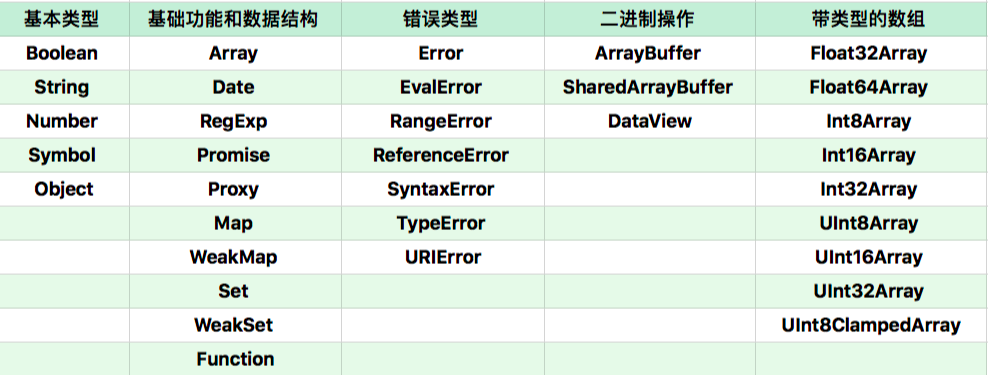

对于宿主和内置对象来说，它们实现[[call]]（作为函数被调用）和[[construct]]（作为构造器被调用）不总是一致的。比如内置对象 Date 在作为构造器调用时产生新的对象，作为函数时，则产生字符串，见以下代码：

In [1]:
console.log(new Date); // 1
console.log(Date())

2020-10-28T17:14:18.200Z
Thu Oct 29 2020 01:14:18 GMT+0800 (China Standard Time)


而浏览器宿主环境中，提供的 Image 构造器，则根本不允许被作为函数调用。

In [2]:
console.log(new Image); 
console.log(Image());//抛出错误

ReferenceError: Image is not defined

再比如基本类型（String、Number、Boolean），它们的构造器被当作函数调用，则产生类型转换的效果。

值得一提的是，在 ES6 之后 => 语法创建的函数仅仅是函数，它们无法被当作构造器使用，见以下代码：

#### 对于用户使用 function 语法或者 Function 构造器创建的对象来说，[[call]]和[[construct]]行为总是相似的，它们执行同一段代码。

In [6]:
function f(){
    return 1;
}
var v = f(); //把f作为函数调用
var o = new f(); //把f作为构造器调用
console.log(v)
console.log(o)

1
f {}


### 我们大致可以认为，它们[[construct]]的执行过程如下：

1. 以 Object.prototype 为原型创建一个新对象；
2. 以新对象为 this，执行函数的[[call]]；
3. 如果[[call]]的返回值是对象，那么，返回这个对象，否则返回第一步创建的新对象。

这样的规则造成了个有趣的现象，如果我们的构造器返回了一个新的对象，那么 new 创建的新对象就变成了一个构造函数之外完全无法访问的对象，这一定程度上可以实现“私有”。

In [8]:
function cls(){
    this.a = 100;
    return {
        getValue:() => this.a
    }
}
var o = new cls;
console.log(o.getValue()); //100
//a在外面永远无法访问到
console.log(a);

100


ReferenceError: a is not defined

##### 我们这次课程留一个挑战任务：不使用 new 运算符，尽可能找到获得对象的方法。

In [12]:
var o = {};
console.log(o);
var o = function(){}
console.log(o);

{}
[Function: o]


// 1. 利用字面量
var a = [], b = {}, c = /abc/g

// 2. 利用dom api
var d = document.createElement('p')

// 3. 利用JavaScript内置对象的api
var e = Object.create(null)
var f = Object.assign({k1:3, k2:8}, {k3: 9})
var g = JSON.parse('{}')

// 4.利用装箱转换
var h = Object(undefined), i = Object(null), k = Object(1), l = Object('abc'), m = Object(true)